### _PCA Reduction and 3D plotting of MEG data using MNE-Python sample data_

Opening raw data file /Users/lauragwilliams/Documents/programming/git_packages/mne-python/examples/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
Current compensation grade : 0
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Reading 0 ... 41699  =      0.000 ...   277.709 secs...
319 events found
Events id: [ 1  2  3  4  5 32]
145 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 4)
4 projection items activated
Loading data for 145 events and 61 original time points ...
0 bad epochs dropped


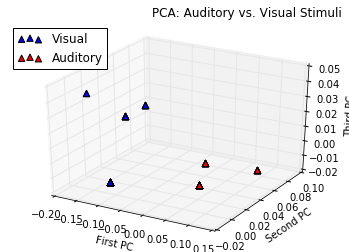

In [1]:
# run PCA on MEG data
# Author: Laura Gwilliams (NYU)
# Email: leg5@nyu.edu
# Dependencies: scikitlearn, matplotlib, MNE-Python
# Version: 2- 08/05/16

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import mne
import numpy as np

# set up file directories to example MNE-Python data
data_path = mne.datasets.sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'

# determine size of epochs
tmin, tmax = -0.0, 0.4
event_id = dict(aud_l=1, vis_l=3)

# load data and make epochs
raw = mne.io.Raw(raw_fname, preload=True)
events = mne.find_events(raw)
epochs = mne.Epochs(raw=raw, events=events, event_id=event_id, tmin=tmin,
                    tmax=tmax, preload=True, baseline=None)

# pull out the data, average over time, and get data labels
X = np.mean(epochs._data,2)
y = epochs.events[:,2]

# fit and apply the PCA
pca = PCA(n_components=3)
X_r = pca.fit(X).transform(X)

#-# plot 3D #-#

# set up dictionaries for plotting colour and legend labels
colour_dict = {'1':'r','3':'b'}
leg_dict = {'1':'Auditory','3':'Visual'}

# init figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# loop through each epoch and plot on 3D scatter
for label_idx in xrange(0,len(y)):
    ax.scatter(X_r[label_idx,0],X_r[label_idx,1],X_r[label_idx,2], marker='^',
               c=colour_dict.get(str(y[label_idx])), s=40,
               label=leg_dict.get(str(y[label_idx])) if label_idx < 2 else "_nolegend_")

# add legend and show
plt.legend(loc='upper left')
plt.title('PCA: Auditory vs. Visual Stimuli', loc='right')
ax.set_xlabel('First PC'), ax.set_ylabel('Second PC'), ax.set_zlabel('Third PC')
plt.show()